In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/gdp-per-country-20202025/2020-2025.csv


In [2]:
df  =  pd.read_csv("/kaggle/input/gdp-per-country-20202025/2020-2025.csv")
df

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,Country,2020,2021,2022,2023,2024,2025
0,Afghanistan,20136,14278.0,14501.0,17248.0,NaN,NaN
1,Albania,15271,18086.0,19185.0,23388.0,27259.0,28372.0
2,Algeria,164774,185850.0,225709.0,247789.0,264913.0,268885.0
3,Andorra,2885,3325.0,3376.0,3786.0,4038.0,4035.0
4,Angola,66521,84375.0,142442.0,109764.0,115946.0,113343.0
...,...,...,...,...,...,...,...
191,Vietnam,346310,370076.0,411068.0,433008.0,459472.0,490970.0
192,Palestine,15532,18109.0,19166.0,17848.0,NaN,NaN
193,Yemen,20220,19394.0,23534.0,19412.0,19101.0,17401.0
194,Zambia,18138,22096.0,29164.0,27578.0,26326.0,28910.0


## about DATASET
* This dataset highlights the economic performance of countries worldwide from 2020 to 2025, capturing GDP values and growth patterns across regions. It reflects the global economic impact of the COVID-19 pandemic in 2020, followed by the recovery phase and subsequent growth trends. The data provides insights into emerging markets, developed economies, and shifts in global economic power, making it valuable for policy analysis, financial forecasting, and comparative studies of national economies.
* contain some missing values in year 2021-2025
* in country columns there is 196 unique countries name

In [3]:
# this warning is due to missing value present in the dataset
# lets check the missing value per columns
df.isna().sum()

Country    0
2020       0
2021       2
2022       2
2023       2
2024       4
2025       7
dtype: int64

In [4]:
# LETS UNDERSTAND THE DATASET
print("shape of dataset ",df.shape)
print("====================\n")
print("columns name are :- ",df.columns)
print("====================\n")
print("infromation of all columns present in the datset ",df.info())
print("====================\n")
print(" analysis of numerical columns ",df.describe())
print("====================")
print("analyis of non-numerical feature ",df.describe(include="O"))




shape of dataset  (196, 7)

columns name are :-  Index(['Country', '2020', '2021', '2022', '2023', '2024', '2025'], dtype='object')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196 entries, 0 to 195
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Country  196 non-null    object 
 1   2020     196 non-null    int64  
 2   2021     194 non-null    float64
 3   2022     194 non-null    float64
 4   2023     194 non-null    float64
 5   2024     192 non-null    float64
 6   2025     189 non-null    float64
dtypes: float64(5), int64(1), object(1)
memory usage: 10.8+ KB
infromation of all columns present in the datset  None

 analysis of numerical columns                 2020          2021          2022          2023          2024  \
count  1.960000e+02  1.940000e+02  1.940000e+02  1.940000e+02  1.920000e+02   
mean   4.378886e+05  5.043504e+05  5.255064e+05  5.486173e+05  5.756871e+05   
std    1.942936e+06  2.220864e+06

In [5]:
# lets find out the countries which have missng values per year

for i in df.drop(columns = "Country"):
    print("country having null values in year ",i)
    print(df[df[i].isna()].Country)
    print("======")




country having null values in year  2020
Series([], Name: Country, dtype: object)
country having null values in year  2021
54     Eritrea
169      Syria
Name: Country, dtype: object
country having null values in year  2022
54     Eritrea
169      Syria
Name: Country, dtype: object
country having null values in year  2023
54     Eritrea
169      Syria
Name: Country, dtype: object
country having null values in year  2024
0      Afghanistan
54         Eritrea
169          Syria
192      Palestine
Name: Country, dtype: object
country having null values in year  2025
0      Afghanistan
54         Eritrea
96         Lebanon
131       Pakistan
161      Sri Lanka
169          Syria
192      Palestine
Name: Country, dtype: object


## imputation
* from our observation we find that country name Syria,Eritrea have null values in every year so we cannot do good predictaion on these counties . So we are going to DROP THESE COUNTRIES
* for 2024 and 2025 country having missing values ,we impute the mean of previous year for these countries  

In [6]:
# for case 1
df = df[df["Country"] != "Eritrea"]
df = df[df["Country"] != "Syria"]

# for case 2
years = ["2020","2021","2022","2023","2024","2025"]

for i, year in enumerate(years):
    if year in ["2024","2025"]:  # Only impute for these
        prev_years = years[:i]   # all previous years
        df[year] = df.apply(
            lambda row: row[prev_years].mean(skipna=True) if pd.isna(row[year]) else row[year],
            axis=1
        )

#  lets check null vallues present or not..
df.isna().sum()

Country    0
2020       0
2021       0
2022       0
2023       0
2024       0
2025       0
dtype: int64

## VISULIZATION 

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

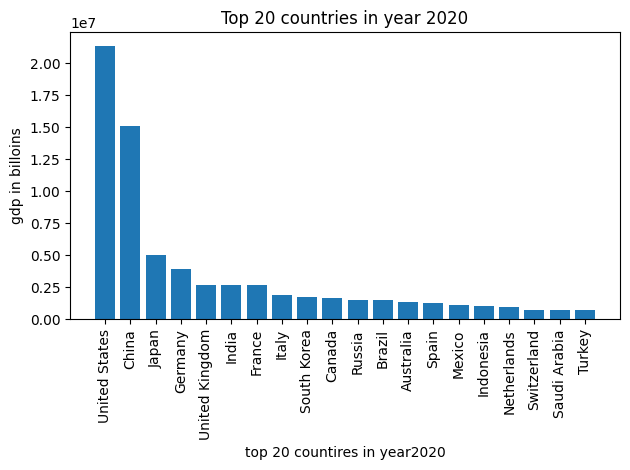

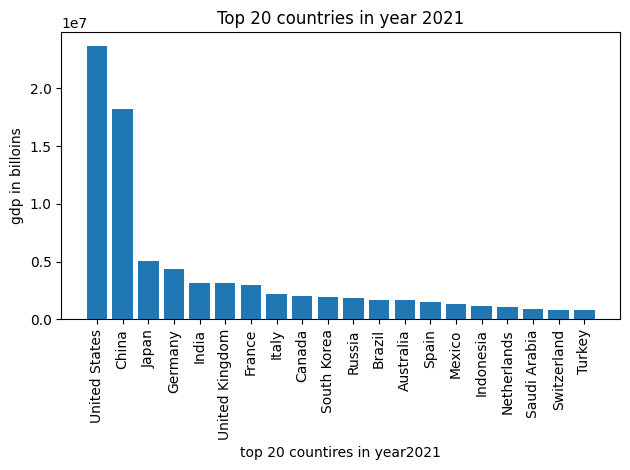

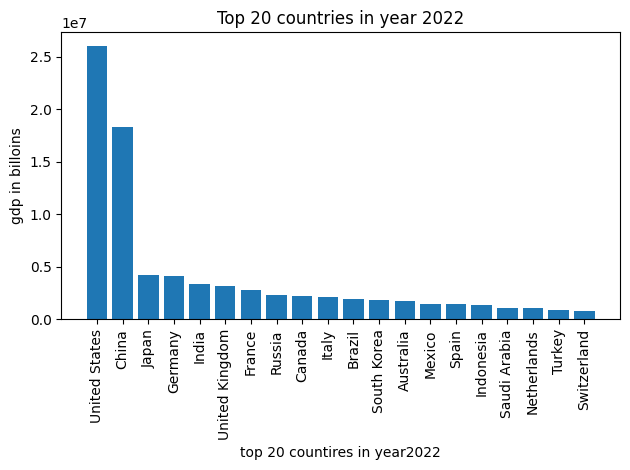

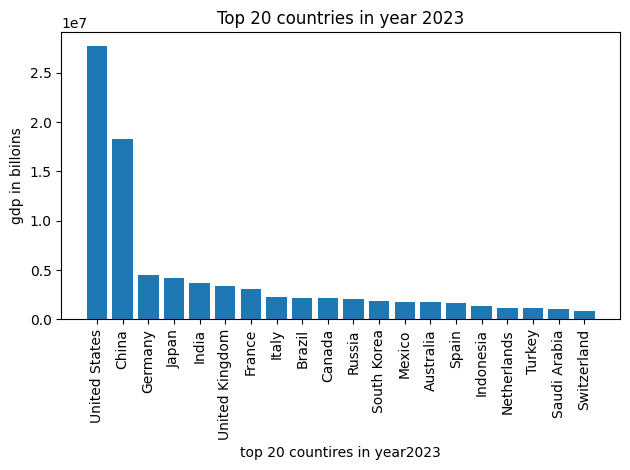

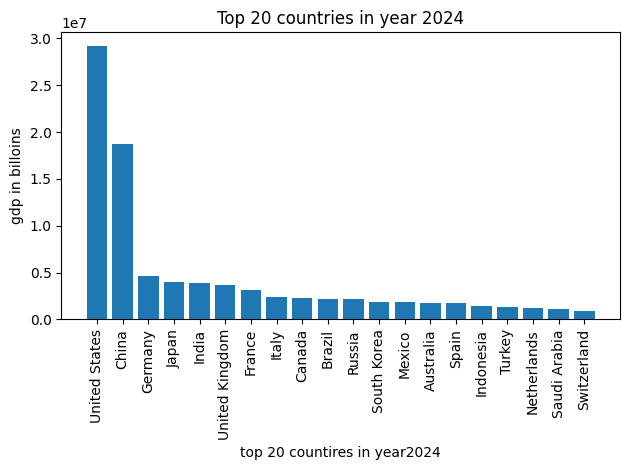

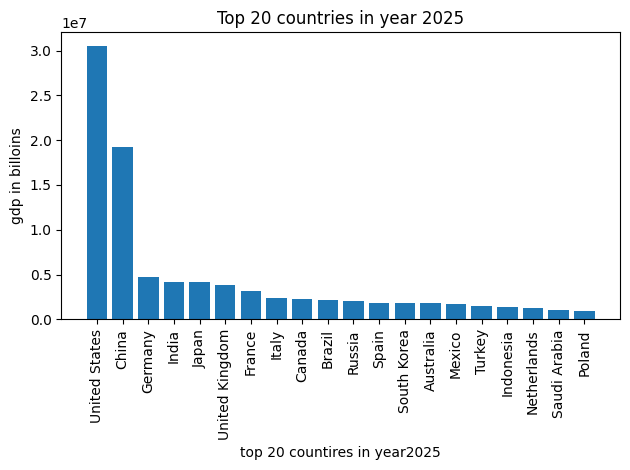

In [8]:
# lets draw plot for top 20 country for year 2020

for i in years:
    
    top20=df.groupby("Country")[i].sum().sort_values(ascending = False).head(20)
    # using matplotlib
    plt.bar(top20.index,top20)
    plt.xticks(rotation = 90)
    plt.xlabel(f"top 20 countires in year{i}")
    plt.ylabel("gdp in billoins")
    plt.title(f"Top 20 countries in year {i}")
    plt.tight_layout()
    plt.show()


                    2020        2021        2022        2023        2024  \
Country                                                                    
Canada           1655685   2022382.0   2190411.0   2173340.0   2241253.0   
China           15103357  18190803.0  18307816.0  18270351.0  18748009.0   
France           2645806   2968405.0   2797049.0   3056880.0   3162023.0   
Germany          3936989   4351188.0   4166872.0   4527009.0   4658526.0   
India            2674852   3167271.0   3346107.0   3638490.0   3909097.0   
Italy            1905956   2180656.0   2105722.0   2305271.0   2372059.0   
Japan            5054069   5039148.0   4262146.0   4213167.0   4026211.0   
Russia           1488118   1828927.0   2295527.0   2059762.0   2161205.0   
United Kingdom   2698705   3144079.0   3125404.0   3371118.0   3644636.0   
United States   21354125  23681175.0  26006900.0  27720725.0  29184900.0   

                      2025  
Country                     
Canada           2225341.0  


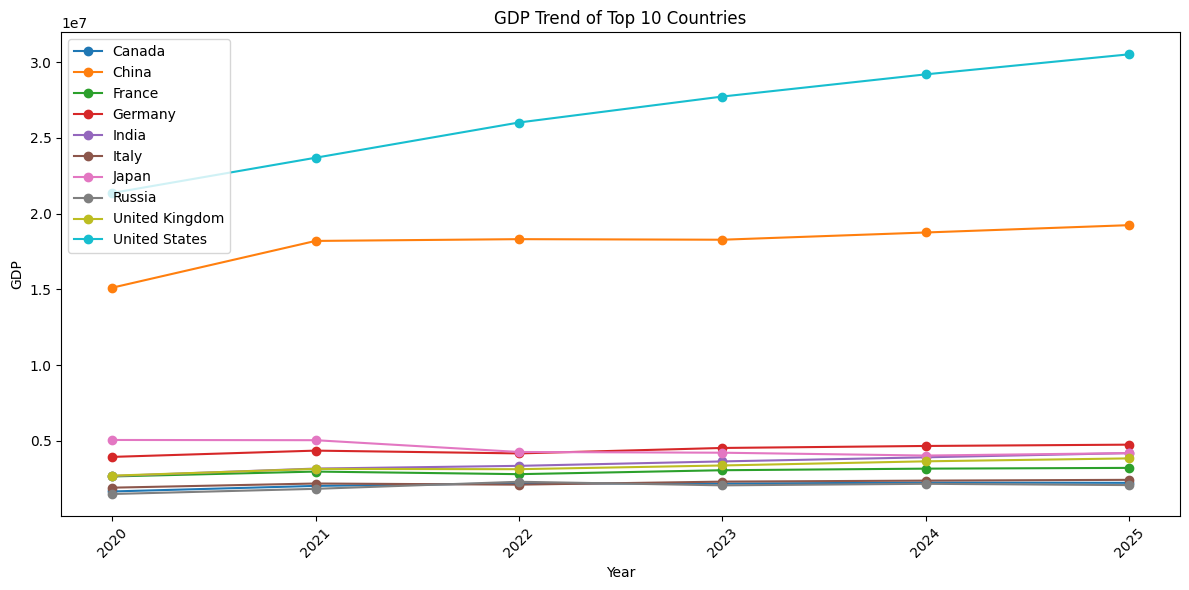

In [9]:
# lets analyise the trend for top 10 country per year

top10=df.groupby("Country").sum()
top10 = top10.sum(axis = 1).sort_values(ascending = False).head(10).index
top10df = df[df["Country"].isin(top10)].set_index("Country")
print(top10df)

plt.figure(figsize=(12,6))
for country in top10df.index:
    plt.plot(top10df.columns, top10df.loc[country], marker='o', label=country)

plt.xlabel("Year")
plt.ylabel("GDP")
plt.title("GDP Trend of Top 10 Countries")
plt.legend(loc="upper left")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## MODELLING

In [10]:
# frist we have to encode the country column
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df["Country"] = le.fit_transform(df.Country)

In [11]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(df.drop(columns = "2025"),df["2025"],test_size = 0.2,random_state = 1)

In [12]:
# importing models
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
lr = LinearRegression()
tre = DecisionTreeRegressor()
forest = RandomForestRegressor()


In [13]:
from sklearn.metrics import r2_score,mean_absolute_error
models = [lr,tre,forest]
for i in models:
    print(f"for model {i}")
    i.fit(xtrain,ytrain)
    print("our model is fitted succesfully")
    print(f"r2 score for {i} is {r2_score(ytest,i.predict(xtest))}")
    print(f"mean_absolute_error for {i} is {mean_absolute_error(ytest,i.predict(xtest))}")
    print("\n================\n")

for model LinearRegression()
our model is fitted succesfully
r2 score for LinearRegression() is 0.9992204481182548
mean_absolute_error for LinearRegression() is 10349.734824284547


for model DecisionTreeRegressor()
our model is fitted succesfully
r2 score for DecisionTreeRegressor() is 0.9679125725737326
mean_absolute_error for DecisionTreeRegressor() is 42087.21153846154


for model RandomForestRegressor()
our model is fitted succesfully
r2 score for RandomForestRegressor() is 0.9767447637438134
mean_absolute_error for RandomForestRegressor() is 33615.76643589744




## Conclusion

* Linear Regression is the best model for this dataset:

   1. Extremely high R² → almost all variance in GDP is captured.
   2.  Lowest MAE → predictions are very accurate.

* Decision Tree and Random Forest perform worse:

    1. They may overfit to some patterns in the training data but generalize less well for your test set.
    2. These models are more suitable for non-linear, complex patterns, but GDP over years is likely a smooth, linear trend, which is why Linear Regression excels.

✅ Recommendation: Use Linear Regression for predicting GDP here. Random Forest/Decision Tree are not adding value and have higher errors.

##
